In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [73]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [74]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...



### remove duplicate and null valune

In [75]:
data.shape

(7920, 3)

In [76]:
data.duplicated().sum()

0

In [77]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [78]:
# text preprocessing


In [79]:
import re
import string


### convert to uppercase and lowercase

In [80]:
data["tweet"] = data["tweet"].apply(lambda x: "   ".join(x.lower() for x in x.split()))

In [81]:
data["tweet"].head(5)


0    #fingerprint   #pregnancy   test   https://goo...
1    finally   a   transparant   silicon   case   ^...
2    we   love   this!   would   you   go?   #talk ...
3    i'm   wired   i   know   i'm   george   i   wa...
4    what   amazing   service!   apple   won't   ev...
Name: tweet, dtype: object

### Remove links

In [82]:


import re

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'https?://\S+', '', word) for word in x.split()))



In [83]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### Remove puncuvation

In [84]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:


def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)



In [86]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [87]:



data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### Remove Numbers

In [88]:

data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)


In [89]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### Downloads Stopwords

In [90]:
import nltk

In [91]:
nltk.download('stopwords',download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [93]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [94]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

### Remove stopwords


In [95]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [96]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [97]:
data

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,would like wish amazing day make every minute ...
7917,7918,0,helping lovely year old neighbor ipad morning ...
7918,7919,0,finally got smart pocket wifi stay connected a...


In [98]:

data["tweet"].tail(5)

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### Stemming

In [99]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [100]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [101]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [102]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Bulding vacabulary


In [103]:


from collections import Counter
vocab = Counter()


In [104]:

vocab

Counter()

In [105]:
for sentence in data['tweet']:
 vocab.update(sentence.split())

In [106]:
len (vocab)

15904

In [107]:
data.shape

(7920, 3)

In [108]:
tokens = [key for key in vocab if vocab[key] > 10]

In [109]:
len(tokens)

1146

In [110]:

tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [111]:
def save_vocabulary(lines , filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding ="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [112]:
x = data ['tweet']
y = data ['label']

In [113]:
x


0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [114]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test =train_test_split(x,y, test_size=0.2) 

In [116]:
x_train.shape

(6336,)

In [117]:
x_test.shape

(1584,)

In [118]:
y_train

6573    0
1762    0
7161    0
5451    0
6284    1
       ..
4677    1
3485    1
7551    1
3517    0
5083    0
Name: label, Length: 6336, dtype: int64

In [119]:
x_test

4635    monday w appl cinnamon hotcak bobevansfarm get...
581     love realli make silli thing iphon wed wedding...
4581    iphon gone recoveri mode bout lose everyth sig...
2912    ye look sexi jhez first brand new ipadmini app...
2467    got samsung gear fit pro free realli happi far...
                              ...                        
115                 natepgilbraith send text turn imessag
4336    one day time selfi mirrorselfi bright highlif ...
981     thank grandpa grandpa gift cellphon soni xperi...
304                                 peopl iphon keep show
7738    skype com prinn linda girl beauti skype iphon ...
Name: tweet, Length: 1584, dtype: object

### vectorization

In [120]:


def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
               
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new


In [121]:

vecterized_x_train = vectorizer(x_train, tokens)

In [122]:
vecterized_x_test = vectorizer(x_test, tokens)

In [123]:
vecterized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [124]:
y_train

6573    0
1762    0
7161    0
5451    0
6284    1
       ..
4677    1
3485    1
7551    1
3517    0
5083    0
Name: label, Length: 6336, dtype: int64

In [125]:
vecterized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [126]:

y_test

4635    0
581     0
4581    1
2912    0
2467    0
       ..
115     1
4336    0
981     0
304     1
7738    0
Name: label, Length: 1584, dtype: int64

In [127]:
y_train.value_counts()

label
0    4738
1    1598
Name: count, dtype: int64

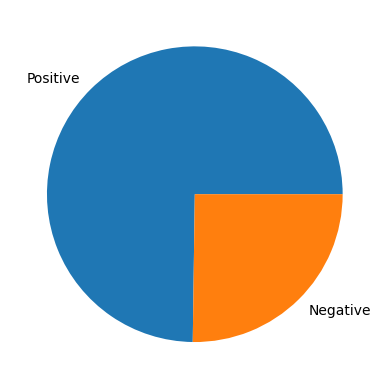

In [128]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive' ,'Negative'])
plt.show()

### handle in blance datasets

In [129]:
!pip install imbalanced_learn

Defaulting to user installation because normal site-packages is not writeable


In [130]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vecterized_x_train_smote, y_train_smote = smote.fit_resample(vecterized_x_train ,y_train)

print(vecterized_x_train_smote.shape, y_train_smote.shape)

(9476, 1146) (9476,)


In [131]:
y_train_smote.value_counts()

label
0    4738
1    4738
Name: count, dtype: int64

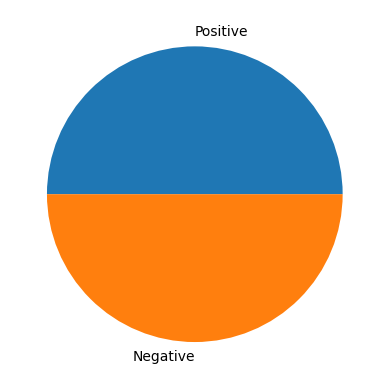

In [132]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive' ,'Negative'])
plt.show()

In [133]:
vecterized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.7151729, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [134]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9471    1
9472    1
9473    1
9474    1
9475    1
Name: label, Length: 9476, dtype: int64

In [135]:
vecterized_x_test



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [136]:
y_test

4635    0
581     0
4581    1
2912    0
2467    0
       ..
115     1
4336    0
981     0
304     1
7738    0
Name: label, Length: 1584, dtype: int64

### Model Traing

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [182]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def training_score(y_act, y_pred):
    acc = round(accuracy_score(y_act ,y_pred), 3)
    pr = round(precision_score(y_act ,y_pred), 3)
    rec = round (recall_score(y_act ,y_pred), 3)
    f1 = round(f1_score(y_act ,y_pred), 3)
    print(f'Training Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score ={f1}')
    
def validation_score(y_act, y_pred):
    acc = round(accuracy_score(y_act ,y_pred), 3)
    pr = round(precision_score(y_act ,y_pred), 3)
    rec = round (recall_score(y_act ,y_pred), 3)
    f1 = round(f1_score(y_act ,y_pred), 3)
    print(f'Testing Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score ={f1}')


### Logistic regression

In [193]:
lr = LogisticRegression()

lr.fit(vecterized_x_train_smote ,y_train_smote )

y_train_pred = lr.predict( vecterized_x_train_smote)

y_test_pred = lr.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)


Training Score:
	Accuracy = 0.938
	Precision = 0.916
	Recall =0.965
	F1-Score =0.94
Testing Score:
	Accuracy = 0.863
	Precision = 0.723
	Recall =0.799
	F1-Score =0.759


### Naive Bayes

In [195]:
mnb = MultinomialNB()

mnb.fit(vecterized_x_train_smote ,y_train_smote )

y_train_pred = mnb.predict( vecterized_x_train_smote)

y_test_pred = mnb.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 0.908
	Precision = 0.872
	Recall =0.957
	F1-Score =0.912
Testing Score:
	Accuracy = 0.864
	Precision = 0.687
	Recall =0.911
	F1-Score =0.783


### Desicion Tree

In [197]:
dt = DecisionTreeClassifier()

dt.fit(vecterized_x_train_smote ,y_train_smote )

y_train_pred = dt.predict( vecterized_x_train_smote)

y_test_pred = dt.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall =0.999
	F1-Score =1.0
Testing Score:
	Accuracy = 0.817
	Precision = 0.674
	Recall =0.624
	F1-Score =0.648


### Random Forest

In [207]:
rf = RandomForestClassifier()

rf.fit(vecterized_x_train_smote ,y_train_smote)

y_train_pred = rf.predict(vecterized_x_train_smote)

y_test_pred = rf.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 0.999
	Recall =1.0
	F1-Score =1.0
Testing Score:
	Accuracy = 0.859
	Precision = 0.779
	Recall =0.668
	F1-Score =0.719


### Support vector mechine

In [208]:
svm = SVC()

svm.fit(vecterized_x_train_smote ,y_train_smote)

y_train_pred = svm.predict(vecterized_x_train_smote)

y_test_pred = svm.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 0.978
	Precision = 0.962
	Recall =0.996
	F1-Score =0.979
Testing Score:
	Accuracy = 0.874
	Precision = 0.764
	Recall =0.771
	F1-Score =0.767


### Save Modle

In [209]:
import pickle
with open('../static/model/model.pickle' ,'wb') as file:
    pickle.dump(svm ,file)